In [1]:
import seaborn as sns

DF = sns.load_dataset('iris')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
DF.head(
    
)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = DF[['sepal_length','sepal_width','petal_length','petal_width']]
y = DF['species']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045)

from sklearn.ensemble import RandomForestClassifier

Model = RandomForestClassifier(n_estimators=10, max_features=3, random_state=2045, n_jobs=-1)
Model.fit(X_train, y_train)

y_hat = Model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_hat))
print(accuracy_score(y_test, y_hat))

[[17  0  0]
 [ 0 14  0]
 [ 0  2 12]]
0.9555555555555556


In [10]:
Model.feature_importances_

array([0.01861013, 0.01469449, 0.66071232, 0.30598306])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


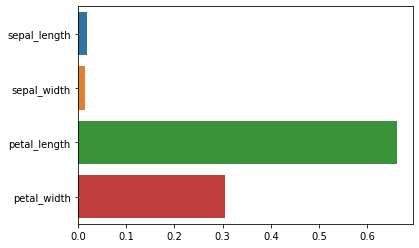

In [11]:
import matplotlib.pyplot as plt

sns.barplot(Model.feature_importances_,
            ['sepal_length','sepal_width','petal_length','petal_width'])
plt.show()

In [13]:
%%time
from sklearn.ensemble import RandomForestClassifier

Model = RandomForestClassifier()
params = {'n_estimators':[100,300,500,700],
          'max_features':[1,2,3,4],
          'max_depth':[1,2,3,4,5],
          'random_state':[2045]}

from sklearn.model_selection import GridSearchCV, KFold
grid_cv = GridSearchCV(Model, param_grid=params, scoring='accuracy', 
                       cv=KFold(n_splits=5, random_state=2045),
                       refit= True, n_jobs=-1)
grid_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CPU times: user 2.06 s, sys: 66.9 ms, total: 2.13 s
Wall time: 3min 11s


In [14]:
grid_cv.best_score_

0.9523809523809523

In [16]:
grid_cv.best_params_

{'max_depth': 3, 'max_features': 1, 'n_estimators': 100, 'random_state': 2045}

In [17]:
Model_cv = grid_cv.best_estimator_
Model_cv

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2045,
                       verbose=0, warm_start=False)

In [18]:
y_hat = Model_cv.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(accuracy_score(y_test, y_hat))


0.9555555555555556
